In [129]:
import os
import pandas as pd
import json
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Arrow
from functools import reduce
%matplotlib inline

In [130]:
def CustomParser(data):
    j1 = json.loads(data)
    return j1

In [131]:
# set path
#path_root = '/media/yassinebha/database29/Drive/QC_zooniverse_2'
#path_root = '/home/yassinebha/Drive/QC_zooniverse_2'
path_root = '/media/yassine/data_disk/Drive/QC_zooniverse_2'

In [132]:
# Read raw table
classifications = pd.read_csv(os.path.join(path_root,'full_lunch_anat_V01/expert-project-classifications.csv'), converters={'metadata':CustomParser,'annotations':CustomParser,'subject_data':CustomParser},header=0)

In [133]:
classifications.head()

classification_id  user_name  user_id               user_ip  workflow_id  \
0           77454765  angelatam   489556  6196a972d686d753f901         5333   
1           77454822  angelatam   489556  6196a972d686d753f901         5333   
2           77454910  angelatam   489556  6196a972d686d753f901         5333   
3           77455375  angelatam   489556  6196a972d686d753f901         5333   
4           77455441  angelatam   489556  6196a972d686d753f901         5333   

    workflow_name  workflow_version               created_at  gold_standard  \
0  Expert Project               1.1  2017-11-06 19:09:02 UTC            NaN   
1  Expert Project               1.1  2017-11-06 19:09:37 UTC            NaN   
2  Expert Project               1.1  2017-11-06 19:10:25 UTC            NaN   
3  Expert Project               1.1  2017-11-06 19:14:57 UTC            NaN   
4  Expert Project               1.1  2017-11-06 19:15:38 UTC            NaN   

   expert                                           metadata  \
0     NaN  {'live_project': True, 'user_agent': 'Mozilla/...   
1     NaN  {'live_project': True, 'user_agent': 'Mozilla/...   
2     NaN  {'live_project': True, 'user_agent': 'Mozilla/...   
3     NaN  {'live_project': True, 'user_agent': 'Mozilla/...   
4     NaN  {'live_project': True, 'user_agent': 'Mozilla/...   

                                         annotations  \
0  [{'task_label': 'Tag mismatched brain areas.

...   
1  [{'task_label': 'Tag mismatched brain areas.

...   
2  [{'task_label': 'Tag mismatched brain areas.

...   
3  [{'task_label': 'Tag mismatched brain areas.

...   
4  [{'task_label': 'Tag mismatched brain areas.

...   

                                        subject_data  subject_ids  
0  {'13249969': {'subject_ID': 'X8628223', 'image...     13249969  
1  {'13249977': {'subject_ID': 'X0010088', 'image...     13249977  
2  {'13249978': {'subject_ID': 'X0021015', 'image...     13249978  
3  {'13249983': {'subject_ID': 'X3011311', 'image...     13249983  
4  {'13250009': {'subject_ID': 'X3433846', 'image...     13250009

In [134]:
# original count
classifications.count()

classification_id    424
user_name            424
user_id              424
user_ip              424
workflow_id          424
workflow_name        424
workflow_version     424
created_at           424
gold_standard          0
expert                 0
metadata             424
annotations          424
subject_data         424
subject_ids          424
dtype: int64

In [135]:
# remove not logged in raters
classifications = classifications[classifications.user_name.str.find("not-logged-in")==-1]
classifications.count()

classification_id    424
user_name            424
user_id              424
user_ip              424
workflow_id          424
workflow_name        424
workflow_version     424
created_at           424
gold_standard          0
expert                 0
metadata             424
annotations          424
subject_data         424
subject_ids          424
dtype: int64

In [136]:
# extract tagging count
classifications.loc[:,"n_tagging"] = [ len(q[0]['value']) for q in classifications.annotations]
# extract rating count
classifications.loc[:,"rating"] = [ q[1]['value'] for q in classifications.annotations]
# extract subjects id
classifications.loc[:,"ID"] = [ row.subject_data[str(classifications.subject_ids[ind])]['subject_ID'] for ind,row in classifications.iterrows()]
# extract files name
classifications.loc[:,"imgnm"] = [ row.subject_data[str(classifications.subject_ids[ind])]['image1'] for ind,row in classifications.iterrows()]

In [137]:
classifications.head()

classification_id  user_name  user_id               user_ip  workflow_id  \
0           77454765  angelatam   489556  6196a972d686d753f901         5333   
1           77454822  angelatam   489556  6196a972d686d753f901         5333   
2           77454910  angelatam   489556  6196a972d686d753f901         5333   
3           77455375  angelatam   489556  6196a972d686d753f901         5333   
4           77455441  angelatam   489556  6196a972d686d753f901         5333   

    workflow_name  workflow_version               created_at  gold_standard  \
0  Expert Project               1.1  2017-11-06 19:09:02 UTC            NaN   
1  Expert Project               1.1  2017-11-06 19:09:37 UTC            NaN   
2  Expert Project               1.1  2017-11-06 19:10:25 UTC            NaN   
3  Expert Project               1.1  2017-11-06 19:14:57 UTC            NaN   
4  Expert Project               1.1  2017-11-06 19:15:38 UTC            NaN   

   expert                                           metadata  \
0     NaN  {'live_project': True, 'user_agent': 'Mozilla/...   
1     NaN  {'live_project': True, 'user_agent': 'Mozilla/...   
2     NaN  {'live_project': True, 'user_agent': 'Mozilla/...   
3     NaN  {'live_project': True, 'user_agent': 'Mozilla/...   
4     NaN  {'live_project': True, 'user_agent': 'Mozilla/...   

                                         annotations  \
0  [{'task_label': 'Tag mismatched brain areas.

...   
1  [{'task_label': 'Tag mismatched brain areas.

...   
2  [{'task_label': 'Tag mismatched brain areas.

...   
3  [{'task_label': 'Tag mismatched brain areas.

...   
4  [{'task_label': 'Tag mismatched brain areas.

...   

                                        subject_data  subject_ids  n_tagging  \
0  {'13249969': {'subject_ID': 'X8628223', 'image...     13249969          1   
1  {'13249977': {'subject_ID': 'X0010088', 'image...     13249977          0   
2  {'13249978': {'subject_ID': 'X0021015', 'image...     13249978          1   
3  {'13249983': {'subject_ID': 'X3011311', 'image...     13249983          0   
4  {'13250009': {'subject_ID': 'X3433846', 'image...     13250009          2   

  rating        ID               imgnm  
0  Maybe  X8628223  X_8628223_anat.png  
1     OK  X0010088  X_0010088_anat.png  
2  Maybe  X0021015  X_0021015_anat.png  
3     OK  X3011311  X_3011311_anat.png  
4  Maybe  X3433846  X_3433846_anat.png

In [138]:
# How many rating per user
user_count = classifications.user_name.value_counts()
user_count

alinanaseer    149
ashherr17      104
angelatam      101
jenichen        70
Name: user_name, dtype: int64

In [139]:
#select only users that have rated a certain ammount of images 
list_user = user_count.index
list_user = list_user[user_count.values>20]
user_count[list_user]

alinanaseer    149
ashherr17      104
angelatam      101
jenichen        70
Name: user_name, dtype: int64

In [140]:
list_user

Index(['alinanaseer', 'ashherr17', 'angelatam', 'jenichen'], dtype='object')

In [167]:
# remove users with less rating then the selected threshold
classifications = classifications[classifications.user_name.isin(list_user)]
classifications.count()

classification_id    424
user_name            424
user_id              424
user_ip              424
workflow_id          424
workflow_name        424
workflow_version     424
created_at           424
gold_standard          0
expert                 0
metadata             424
annotations          424
subject_data         424
subject_ids          424
n_tagging            424
rating               424
ID                   424
imgnm                424
dtype: int64

In [168]:
classifications.to_csv(os.path.join(path_root,'full_lunch_anat_V01/expert-project-classifications_raw.csv'))

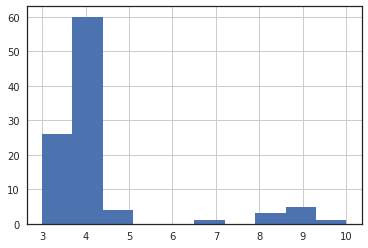

In [169]:
# plot rating per image distribution
image_count = classifications.subject_ids.value_counts()
image_count.hist()

In [170]:
#Merge Users rating
conctat_rating = [classifications[classifications.user_name == user][['ID','rating']].rename(columns={'rating': user})
                  for user in list_user]
# keep unique ID's
concats_unique = [conctat_rating[ii].ix[conctat_rating[ii].ix[:,0].drop_duplicates().index] 
                  for ii in range(len(conctat_rating))]
df_rating = reduce(lambda left,right: pd.merge(left,right,how='outer',on='ID'), concats_unique)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [171]:
df_rating.count()

ID             100
alinanaseer    100
ashherr17      100
angelatam      100
jenichen        70
dtype: int64

In [172]:
# remove duplicates
#df_rating = df_rating[~df_rating.ID.duplicated()]

In [173]:
stuff = np.array([[np.sum(row[1:-1].values=='Fail'),
         np.sum(row[1:-1].values=='Maybe'),
         np.sum(row[1:-1].values=='OK')] for ind, row in df_rating.iterrows()])

In [174]:
df_score = pd.DataFrame(index=df_rating.index,data=stuff, columns=['Fail', 'Maybe', 'OK'])

In [175]:
# Normalise table's row
nb_rating = df_score.sum(axis="columns")
df_norm = pd.DataFrame( index=df_rating.index,columns=['Fail', 'Maybe', 'OK'])
for status in df_score.columns.values:
    for image in df_score.index:
        df_norm[status][image] = df_score[status][image]/nb_rating[image]

In [176]:
df_norm.tail()

Fail     Maybe        OK
95    0  0.333333  0.666667
96    0  0.666667  0.333333
97    0  0.333333  0.666667
98    0         0         1
99    0  0.666667  0.333333

## Histograms
Histograms of the frequency of the "OK", "Maybe" and "fail" rating across raters, for all images. If all raters agreed, we would only have 0% or 100% rating frequencies. 

Text(0.5,1,'OK')

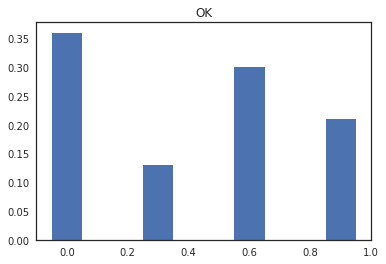

In [177]:
# Histogram of OK
hok , bins = np.histogram(df_norm.OK,bins=np.arange(0,1.1,0.1))
hok = hok.astype(np.float32) / hok.sum()
plt.bar(bins[:-1], hok , width=(bins[1]-bins[0]))
plt.title('OK')

Text(0.5,1,'Maybe')

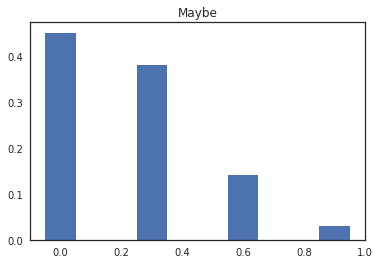

In [178]:
# Histogram of Maybe
hmaybe , bins = np.histogram(df_norm.Maybe,bins=np.arange(0,1.1,0.1))
hmaybe = hmaybe.astype(np.float32) / hmaybe.sum()
plt.bar(bins[:-1], hmaybe , width=(bins[1]-bins[0]))
plt.title('Maybe')

Text(0.5,1,'Fail')

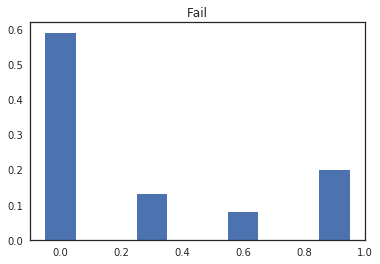

In [179]:
# Histogram of Fail
hfail , bins = np.histogram(df_norm.Fail,bins=np.arange(0,1.1,0.1))
hfail = hfail.astype(np.float32) / hfail.sum()
plt.bar(bins[:-1], hfail , width=(bins[1]-bins[0]))
plt.title('Fail')

## Kappa score

In [180]:
# filter user who completed rating for kappa
name_users_kappa = [ix for ix,x in user_count.iteritems() if x >= 70]
name_users_kappa

['alinanaseer', 'ashherr17', 'angelatam', 'jenichen']

In [181]:
#select raters
df_kappa = df_rating[["ID"]+ name_users_kappa]
df_kappa.count()

ID             100
alinanaseer    100
ashherr17      100
angelatam      100
jenichen        70
dtype: int64

In [182]:
# add matching column 
df_kappa.loc[:,"rating_match"] = df_kappa.iloc[:,1:].apply(lambda x: len(set(x)) == 1, axis=1)

In [183]:
df_kappa.to_csv(os.path.join(path_root,'full_lunch_anat_V01/expert-project-classifications_sub-select.csv'))
df_kappa

ID alinanaseer ashherr17 angelatam jenichen  rating_match
0    X0010052          OK        OK     Maybe    Maybe         False
1    X2030383          OK        OK        OK    Maybe         False
2    X1481430          OK        OK        OK       OK          True
3    X3809753          OK        OK     Maybe       OK         False
4    X0010038          OK        OK     Maybe       OK         False
5    X0021020          OK        OK        OK       OK          True
6    X0026002          OK      Fail      Fail      NaN         False
7    X3519022       Maybe      Fail      Fail     Fail         False
8    X1536593        Fail      Fail      Fail     Fail          True
9    X0010045          OK        OK        OK    Maybe         False
10   X3679455        Fail      Fail      Fail      NaN         False
11  HC0040038          OK        OK        OK    Maybe         False
12  HC0040050          OK        OK     Maybe      NaN         False
13  HC0040051          OK        OK        OK    Maybe         False
14   X8628223          OK        OK     Maybe       OK         False
15   X0010033          OK        OK     Maybe       OK         False
16   X0026024          OK        OK     Maybe       OK         False
17   X3611827       Maybe      Fail      Fail      NaN         False
18   X3107623          OK        OK        OK      NaN         False
19   X3684229       Maybe      Fail        OK      NaN         False
20   X6206397        Fail      Fail      Fail      NaN         False
21   X3322144       Maybe     Maybe      Fail      NaN         False
22   X1743472        Fail      Fail      Fail     Fail          True
23   X2014113          OK        OK        OK       OK          True
24   X2740232        Fail      Fail      Fail     Fail          True
25   X4104523       Maybe     Maybe     Maybe     Fail         False
26   X0010007       Maybe      Fail     Maybe    Maybe         False
27   X3902469          OK        OK     Maybe    Maybe         False
28   X2081148          OK        OK        OK      NaN         False
29   X0010120          OK        OK     Maybe    Maybe         False
..        ...         ...       ...       ...      ...           ...
70   X0010083          OK      Fail     Maybe       OK         False
71   X0021015          OK        OK     Maybe      NaN         False
72   X3011311          OK        OK        OK       OK          True
73   X3917422       Maybe      Fail      Fail    Maybe         False
74   X1647968          OK        OK     Maybe      NaN         False
75   X3051944          OK        OK        OK       OK          True
76   X2054998          OK        OK     Maybe    Maybe         False
77   X3169448          OK        OK     Maybe    Maybe         False
78   X2907383       Maybe      Fail     Maybe      NaN         False
79   X0010032        Fail      Fail      Fail     Fail          True
80  HC0040048          OK        OK     Maybe    Maybe         False
81  HC0040055          OK        OK     Maybe    Maybe         False
82  HC0040056          OK        OK        OK      NaN         False
83  HC0040058          OK     Maybe        OK    Maybe         False
84   X3515506       Maybe     Maybe     Maybe    Maybe          True
85   X1435954        Fail      Fail      Fail     Fail          True
86   X9750701       Maybe      Fail      Fail      NaN         False
87   X0026022          OK        OK     Maybe       OK         False
88   X0010061        Fail      Fail      Fail     Fail          True
89   X0010049       Maybe     Maybe      Fail    Maybe         False
90   X0023019       Maybe        OK     Maybe     Fail         False
91   X0023027       Maybe        OK        OK    Maybe         False
92   X3912996          OK        OK     Maybe       OK         False
93   X0010013        Fail      Fail      Fail     Fail          True
94  HC0040054          OK        OK        OK       OK          True
95  HC0040057          OK        OK     Maybe       OK         False
96  HC004

In [184]:
#drop NaN
df_kappa.dropna(inplace=True)

In [185]:
df_kappa.count()

ID              70
alinanaseer     70
ashherr17       70
angelatam       70
jenichen        70
rating_match    70
dtype: int64

In [159]:
# Replace OK:1 , Maybe:2 and Fail:3
df_kappa.replace({'OK':1,'Maybe':2, 'Fail':3}, inplace=True)
df_kappa.head()

ID  alinanaseer  ashherr17  angelatam  jenichen  rating_match
0  X0010052            1          1          2         2         False
1  X2030383            1          1          1         2         False
2  X1481430            1          1          1         1          True
3  X3809753            1          1          2         1         False
4  X0010038            1          1          2         1         False

In [160]:
# remove duplicates ID's
df_kappa = df_kappa[~df_kappa.ID.duplicated()]
df_kappa.count()

ID              70
alinanaseer     70
ashherr17       70
angelatam       70
jenichen        70
rating_match    70
dtype: int64

In [161]:
# calculate the percentage of agreement
agreem_num = (df_kappa.rating_match.sum()/df_kappa.ID.count())*100
"The percentage of agreement is: {:.2f}".format(agreem_num)

'The percentage of agreement is: 37.14'

In [162]:
# Generate Kappa matrix rater by rater
kappa_store = np.zeros((len(name_users_kappa), len(name_users_kappa)))
for net_id in range(len(name_users_kappa)):
    rater_1 = name_users_kappa[net_id]
    for s_id in range(len(name_users_kappa)):
        rater_2 = name_users_kappa[s_id]
        kappa = metrics.cohen_kappa_score(df_kappa[[rater_1]],df_kappa[[rater_2]])
        # Save the kappa
        kappa_store[net_id, s_id] = kappa

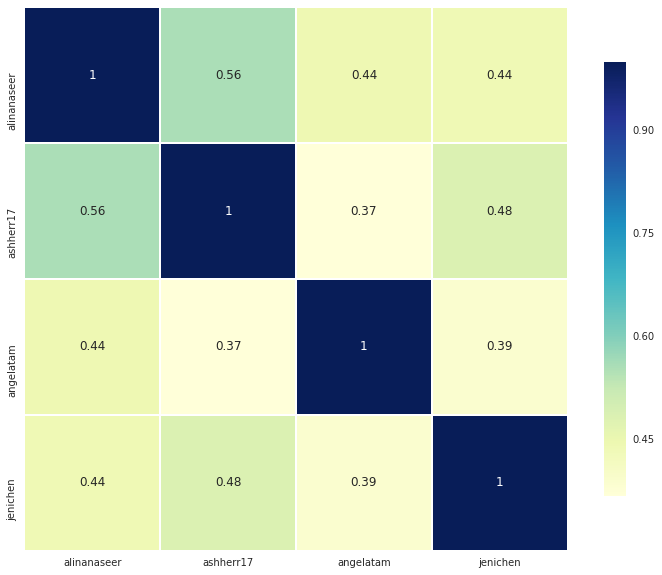

In [163]:
# Plot kappa matrix

kappa_out = pd.DataFrame(kappa_store, index=name_users_kappa, columns=name_users_kappa)
sns.set(style="white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))
# Draw the map
sns.heatmap(kappa_out,vmax=1,cmap="YlGnBu",
            square=True,annot=True,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

In [43]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.stack.imgur.com/kYNd6.png" ,width=600, height=600)

## Plot tagging on images 

In [44]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt

In [45]:
#base_path = '/home/yassinebha/Drive/QC_zooniverse_2/brainhack2017/rating_images'

In [46]:
# output markings from classifications
clist=[]
for index, c in classifications.iterrows():
    if c['n_tagging'] > 0:
        for q in c.annotations[0]['value']:
            clist.append({'ID':c.ID, 'workflow_name':c.workflow_name,'user_name':c.user_name, 'rating':c.rating,'imgnm':c.imgnm, 
                          'x':q['x'], 'y':np.round(q['y']).astype(int), 'r':'2','n_tagging':c.n_tagging ,'frame':q['frame']})
    else:
        clist.append({'ID':c.ID, 'workflow_name':c.workflow_name, 'user_name':c.user_name,'rating':c.rating,'imgnm':c.imgnm, 
                          'x':float('nan'), 'y':float('nan'), 'r':float('nan'),'n_tagging':c.n_tagging ,'frame':'1'})

col_order=['ID','workflow_name','user_name','rating','x','y','r','n_tagging','imgnm','frame']
out = pd.DataFrame(clist)[col_order]

In [47]:
out

ID   workflow_name    user_name rating           x      y    r  \
0      X8628223  Expert Project    angelatam  Maybe  471.468750  599.0    2   
1      X0010088  Expert Project    angelatam     OK         NaN    NaN  NaN   
2      X0021015  Expert Project    angelatam  Maybe   47.468750  662.0    2   
3      X3011311  Expert Project    angelatam     OK         NaN    NaN  NaN   
4      X3433846  Expert Project    angelatam  Maybe   44.468750  659.0    2   
5      X3433846  Expert Project    angelatam  Maybe   60.468750  180.0    2   
6      X0010045  Expert Project    angelatam     OK         NaN    NaN  NaN   
7      X3912996  Expert Project    angelatam  Maybe   54.468750  356.0    2   
8      X0010013  Expert Project    angelatam   Fail  473.468750  100.0    2   
9      X0010013  Expert Project    angelatam   Fail  482.468750  137.0    2   
10     X0010013  Expert Project    angelatam   Fail  516.468750  153.0    2   
11     X0010013  Expert Project    angelatam   Fail  269.468750  110.0    2   
12     X0010013  Expert Project    angelatam   Fail  306.468750  146.0    2   
13     X0010013  Expert Project    angelatam   Fail  286.468750  188.0    2   
14     X0010013  Expert Project    angelatam   Fail  333.468750  185.0    2   
15     X0010013  Expert Project    angelatam   Fail  152.468750  160.0    2   
16     X0010013  Expert Project    angelatam   Fail  113.468750  145.0    2   
17     X0010013  Expert Project    angelatam   Fail   71.468750  172.0    2   
18     X0010013  Expert Project    angelatam   Fail  129.468750  187.0    2   
19     X0010013  Expert Project    angelatam   Fail   62.468750  114.0    2   
20     X0010013  Expert Project    angelatam   Fail   67.468750  389.0    2   
21     X0010013  Expert Project    angelatam   Fail   51.468750  419.0    2   
22     X0010013  Expert Project    angelatam   Fail   79.468750  441.0    2   
23     X0010013  Expert Project    angelatam   Fail  100.468750  404.0    2   
24     X0010013  Expert Project    angelatam   Fail  263.468750  363.0    2   
25     X0010013  Expert Project    angelatam   Fail  285.468750  388.0    2   
26     X0010013  Expert Project    angelatam   Fail  263.468750  404.0    2   
27     X0010013  Expert Project    angelatam   Fail   84.468750  652.0    2   
28     X0010013  Expert Project    angelatam   Fail  468.468750  350.0    2   
29     X0010013  Expert Project    angelatam   Fail  483.468750  380.0    2   
...         ...             ...          ...    ...         ...    ...  ...   
1500   X1435954  Expert Project  alinanaseer   Fail  135.468750  392.0    2   
1501   X1435954  Expert Project  alinanaseer   Fail  164.468750  401.0    2   
1502   X1435954  Expert Project  alinanaseer   Fail  340.468750  176.0    2   
1503   X1435954  Expert Project  alinanaseer   Fail  185.468750  561.0    2   
1504   X1435954  Expert Project  alinanaseer   Fail   94.468750  659.0    2   
1505   X1435954  Expert Project  alinanaseer   Fail  133.468750  654.0    2   
1506   X1435954  Expert Project  alinanaseer   Fail  107.468750  639.0    2   
1507   X1435954  Expert Project  alinanaseer   Fail  154.468750  649.0    2   
1508   X9750701  Expert Project  alinanaseer  Maybe   35.468750  610.0    2   
1509   X9750701  Expert Project  alinanaseer  Maybe   28.468750  372.0    2   
1510   X9750701  Expert Project  alinanaseer  Maybe  503.468750  201.0    2   
1511   X9750701  Expert Project  alinanaseer  Maybe  556.468750  202.0    2   
1512   X2014113  Expert Project    ashherr17     OK         NaN    NaN  NaN   
1513   X4362730  Expert Project    ashherr17   Fail  386.484375  310.0    2   
1514   X4362730  Expert Project    ashherr17   Fail  126.484375   80.0    2   
1515   X4362730  Expert Project    ashherr17   Fail   91.484375   76.0    2   
1516   X3902469  Expert Project    ashherr17     OK         NaN    NaN  NaN   
1517   X0010009  Expert Project    ashherr17     OK         NaN    NaN  NaN   
1518   X3169448  Expert Project    ashherr17     OK         NaN

In [48]:
# out only selected rater
out_kappa = out.loc[out['user_name'].isin(name_users_kappa)]
# out only kappa rated images
out_kappa = out_kappa.loc[out_kappa['ID'].isin(df_kappa.ID)]
out_kappa.head()

ID   workflow_name  user_name rating          x      y    r  \
0  X8628223  Expert Project  angelatam  Maybe  471.46875  599.0    2   
1  X0010088  Expert Project  angelatam     OK        NaN    NaN  NaN   
3  X3011311  Expert Project  angelatam     OK        NaN    NaN  NaN   
4  X3433846  Expert Project  angelatam  Maybe   44.46875  659.0    2   
5  X3433846  Expert Project  angelatam  Maybe   60.46875  180.0    2   

   n_tagging               imgnm frame  
0          1  X_8628223_anat.png     0  
1          0  X_0010088_anat.png     1  
3          0  X_3011311_anat.png     1  
4          2  X_3433846_anat.png     0  
5          2  X_3433846_anat.png     0

In [49]:
ids_imgnm = np.reshape([out_kappa.ID.unique(),out_kappa.imgnm.unique()],(2,np.shape(out_kappa.ID.unique())[0]))

In [50]:
from shutil import copyfile, copy2
#base_path_src = os.path.join(path_root,'zooqc_report_adhd_03-Jul-2017/registration')
base_path_src = os.path.join(path_root,'zooqc_report_cobre_03-Jul-2017/registration')
base_path_dest = os.path.join(path_root,'Beta2/rating_images')

In [51]:
# juste run once to collect images in specific folder
#from shutil import copyfile, copy2
#base_path_src = os.path.join(path_root,'zooqc_report_adhd_03-Jul-2017/registration')
#base_path_src = os.path.join(path_root,'zooqc_report_cobre_03-Jul-2017/registration')
#base_path_dest = os.path.join(path_root,'Beta2/rating_images')
#for ii in np.sort(ids_imgnm.T[:,1])[:15]:#[15:]
    #print(ii)
    #copy2(os.path.join(base_path_src,ii),base_path_dest)

In [52]:
df_ids_imgnm = pd.DataFrame(np.sort(ids_imgnm.T, axis=0),columns=['ID', 'imgnm'])

In [53]:
df_ids_imgnm.count()

ID       56
imgnm    56
dtype: int64

In [55]:
#df_ids_imgnm = df_ids_imgnm.iloc[:10]

In [56]:
df_ids_imgnm = df_ids_imgnm[df_ids_imgnm.ID.isin(['X1435954'])]

In [57]:
list_tagger = out_tmp.user_name.unique()

NameError: name 'out_tmp' is not defined

In [58]:
df_ids_imgnm

ID               imgnm
23  X1435954  X_1435954_anat.png

In [59]:
import colorsys
N = 5
HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
RGB_tuples = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))

In [60]:
RGB_tuples

[(0.5, 0.25, 0.25),
 (0.44999999999999996, 0.5, 0.25),
 (0.25, 0.5, 0.3500000000000001),
 (0.25, 0.3500000000000001, 0.5),
 (0.4500000000000002, 0.25, 0.5)]

In [93]:

list_tagger = out_kappa.user_name.unique()
colors_tagger = sns.color_palette("Set2", len(list_tagger))

In [111]:
np.append(c,c)

array([<matplotlib.patches.Circle object at 0x7f14109c5e10>,
       <matplotlib.patches.Circle object at 0x7f14109c5e10>], dtype=object)

In [116]:
patches

In [120]:
patches = []

In [122]:
patches.append(c)

In [123]:
patches

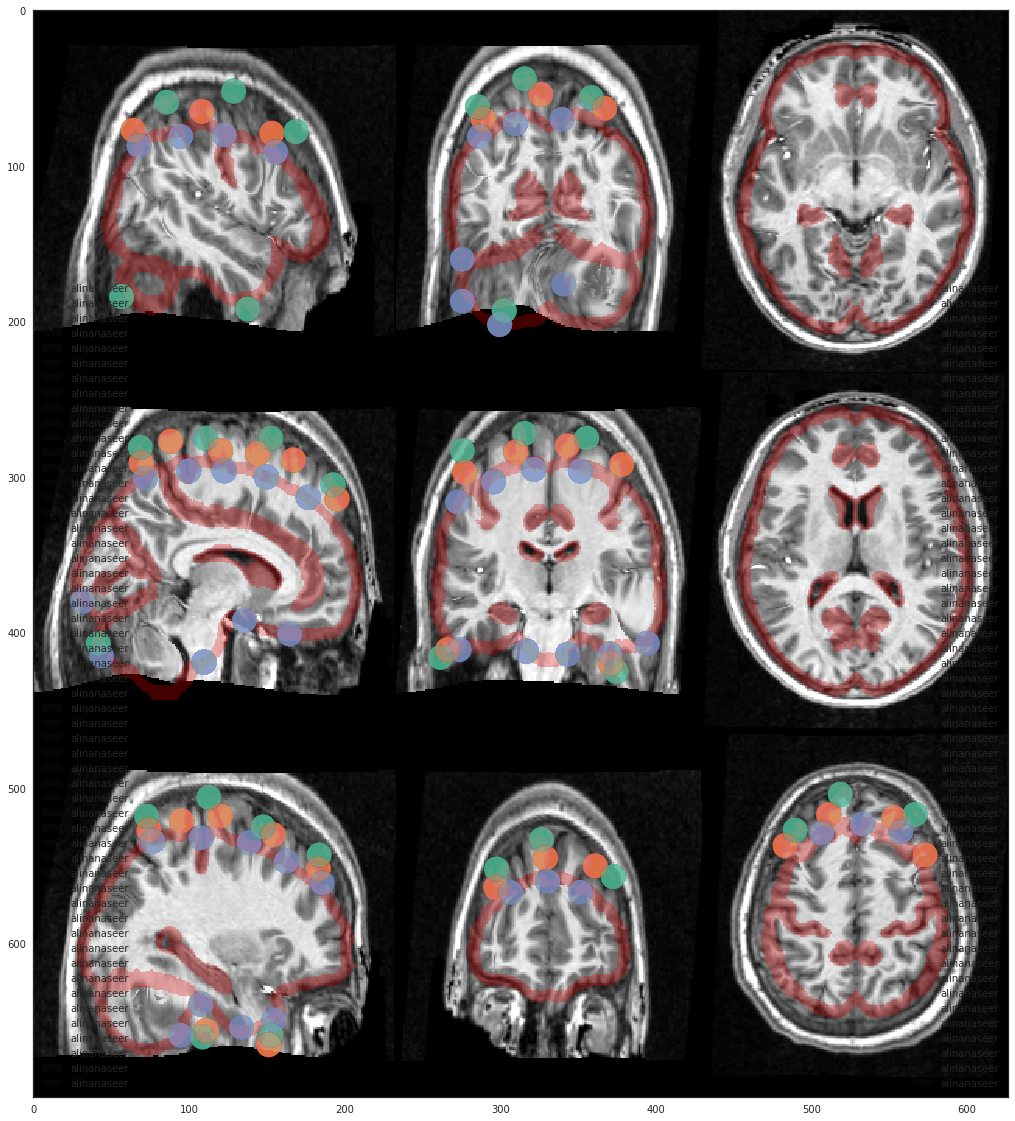

In [128]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
im = plt.imread(os.path.join(base_path_dest, row.imgnm))
ax.imshow(im)
out_tmp = out_kappa[out_kappa['ID'] == row.ID]
patches = []
labels = []
for ind,row in out_tmp.iterrows():
    for idx,tagger in enumerate(list_tagger):
        out_tagger = out_tmp[out_tmp['user_name'] == tagger]
        for itag,rowtag in out_tagger.iterrows():
            c=Circle((rowtag.x,rowtag.y), 8,color =colors_tagger[idx],label =tagger, alpha=0.03)
            ax.add_patch(c)
        
    patches.append(c)
    labels.append(tagger)
ax.legend(handles=patches,  mode='expand', ncol=2, loc="lower left")

In [67]:
p.get_label

<bound method Artist.get_label of <matplotlib.collections.PatchCollection object at 0x7f141366dd68>>

In [135]:
p = PatchCollection(patches, cmap=plt.get_cmap('Spectral_r'), alpha=0.5)
#p.set_array(np.array(colours))
ax.add_collection(p)
#p.set_clim(colour_scale)
#fig.colorbar(p, ax=ax, fraction=0.015)
#plt.xlabel(str_title)

# generate legend
# create a `ScalarMappable` object with the colormap used, and the right scaling
cm = matplotlib.cm.ScalarMappable(cmap=p.get_cmap())
cm.set_clim(colour_scale)
# create a list of Patches for the legend
l = [Circle((None,None), facecolor=cm.to_rgba(mean_value)) for mean_value in colours]
# add legend to plot
ax.legend(handles=l, labels=legends, bbox_to_anchor=(0., 1.02, 1., .2), mode='expand', ncol=2, loc="lower left")

ValueError: setting an array element with a sequence.

In [56]:
patches.append(patches.pop)

NameError: name 'patches' is not defined

In [ ]:
X0010013

In [54]:
def plotFeatures( patches, colours, legends, colour_scale ):

    p = PatchCollection(patches, cmap=plt.get_cmap('Spectral_r'), alpha=0.5)
    p.set_array(np.array(colours))
    ax.add_collection(p)
    p.set_clim(colour_scale)
    fig.colorbar(p, ax=ax, fraction=0.015)
    #plt.xlabel(str_title)

    # generate legend
    # create a `ScalarMappable` object with the colormap used, and the right scaling
    cm = matplotlib.cm.ScalarMappable(cmap=p.get_cmap())
    cm.set_clim(colour_scale)
    # create a list of Patches for the legend
    l = [Circle((None,None), facecolor=cm.to_rgba(mean_value)) for mean_value in colours]
    # add legend to plot
    ax.legend(handles=l, labels=legends, bbox_to_anchor=(0., 1.02, 1., .2), mode='expand', ncol=2, loc="lower left")


    # ax.set_xticks([]); ax.set_yticks([])

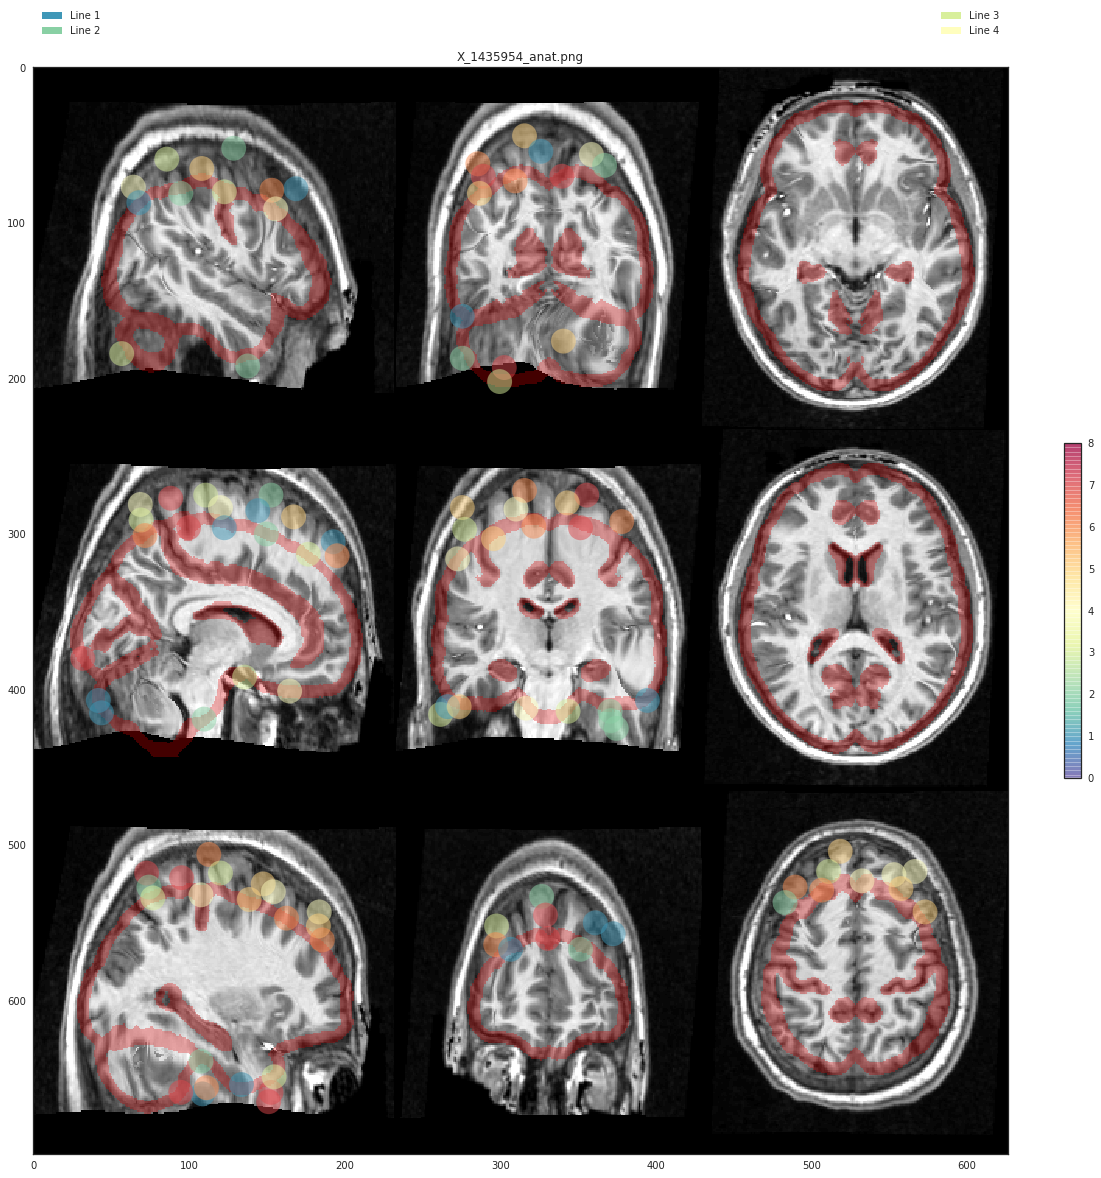

In [136]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Arrow
patches = list()
for ind, row in df_ids_imgnm.iterrows():
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    im = plt.imread(os.path.join(base_path_dest, row.imgnm))
    ax.imshow(im)
    out_tmp = out_kappa[out_kappa['ID'] == row.ID]
    
    patches = [plt.Circle((row.x,row.y), 8) for ind,row in out_tmp.iterrows()]
    #coll = matplotlib.collections.PatchCollection(patches, facecolors='green',alpha=0.3,linewidth=2)
    #ax.add_collection(coll)
    ax.set_title(row.imgnm)
    #fig.legend(handles=patches, labels= out_tmp.workflow_name.unique().tolist())
    plotFeatures(patches,colours=[1,2,3,4,5,6,7],
                 legends=['Line 1', 'Line 2', 'Line 3', 'Line 4']
                 ,colour_scale=[0, 8])

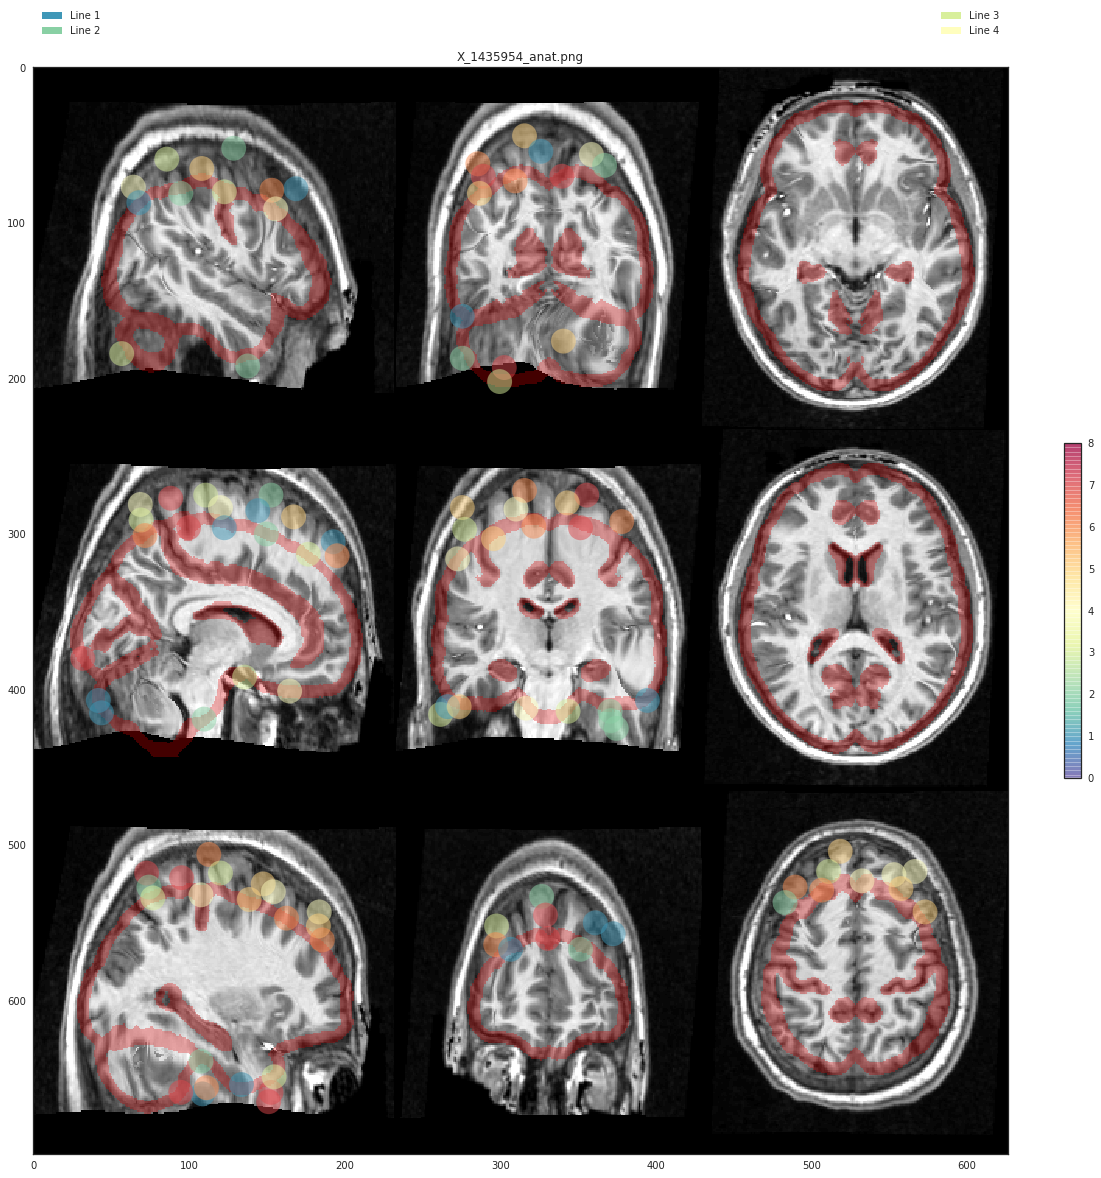

In [73]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Arrow

for ind, row in df_ids_imgnm.iterrows():
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    im = plt.imread(os.path.join(base_path_dest, row.imgnm))
    ax.imshow(im)
    out_tmp = out_kappa[out_kappa['ID'] == row.ID]
    patches = [plt.Circle((row.x,row.y), 8) for ind,row in out_tmp.iterrows()]
    #coll = matplotlib.collections.PatchCollection(patches, facecolors='green',alpha=0.3,linewidth=2)
    #ax.add_collection(coll)
    ax.set_title(row.imgnm)
    #fig.legend(handles=patches, labels= out_tmp.workflow_name.unique().tolist())
    plotFeatures(patches,colours=[1,2,3,4,5,6,7],
                 legends=['Line 1', 'Line 2', 'Line 3', 'Line 4']
                 ,colour_scale=[0, 8])

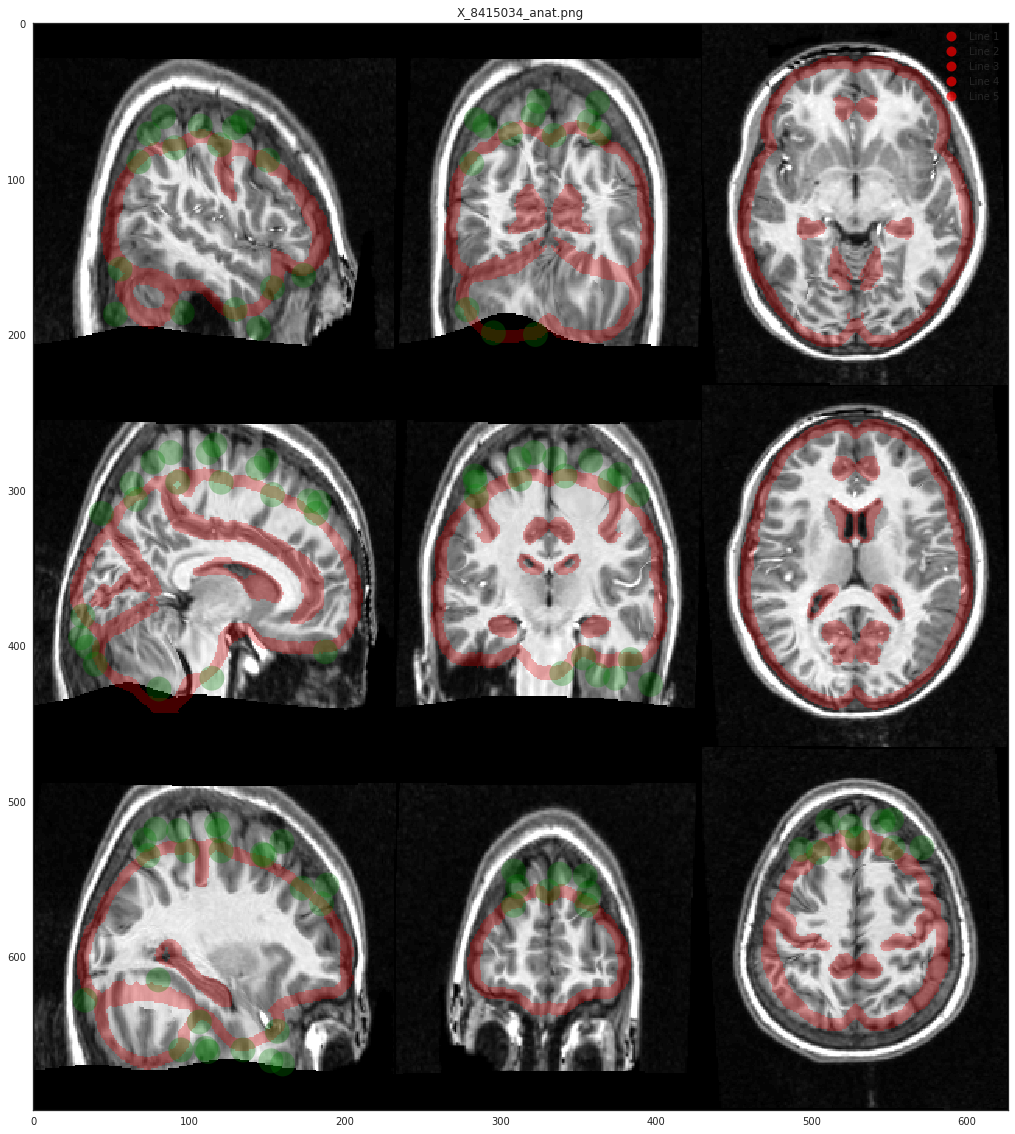

In [200]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
im = plt.imread(os.path.join(base_path_dest, row.imgnm))
ax.imshow(im)
out_tmp = out_kappa[out_kappa['ID'] == row.ID]
patches = [plt.Circle((row.x,row.y), 8) for ind,row in out_tmp.iterrows()]
coll = matplotlib.collections.PatchCollection(patches, facecolors='green',alpha=0.3,linewidth=2)
ax.add_collection(coll)
ax.autoscale()
ax.set_title(row.imgnm)

#fig.legend(handles=patches, labels= out_tmp.workflow_name.unique().tolist())

z = np.array(range(len(patches)))
def make_proxy(zvalue, scalar_mappable, **kwargs):
    color = scalar_mappable.cmap(scalar_mappable.norm(zvalue))
    return Line2D([0], [0],linestyle="none", marker="o",markersize=10, color='red',alpha=0.7, **kwargs)
proxies = [make_proxy(item, coll) for item in z]

ax.legend(proxies, ['Line 1', 'Line 2', 'Line 3', 'Line 4','Line 5'])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1506: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


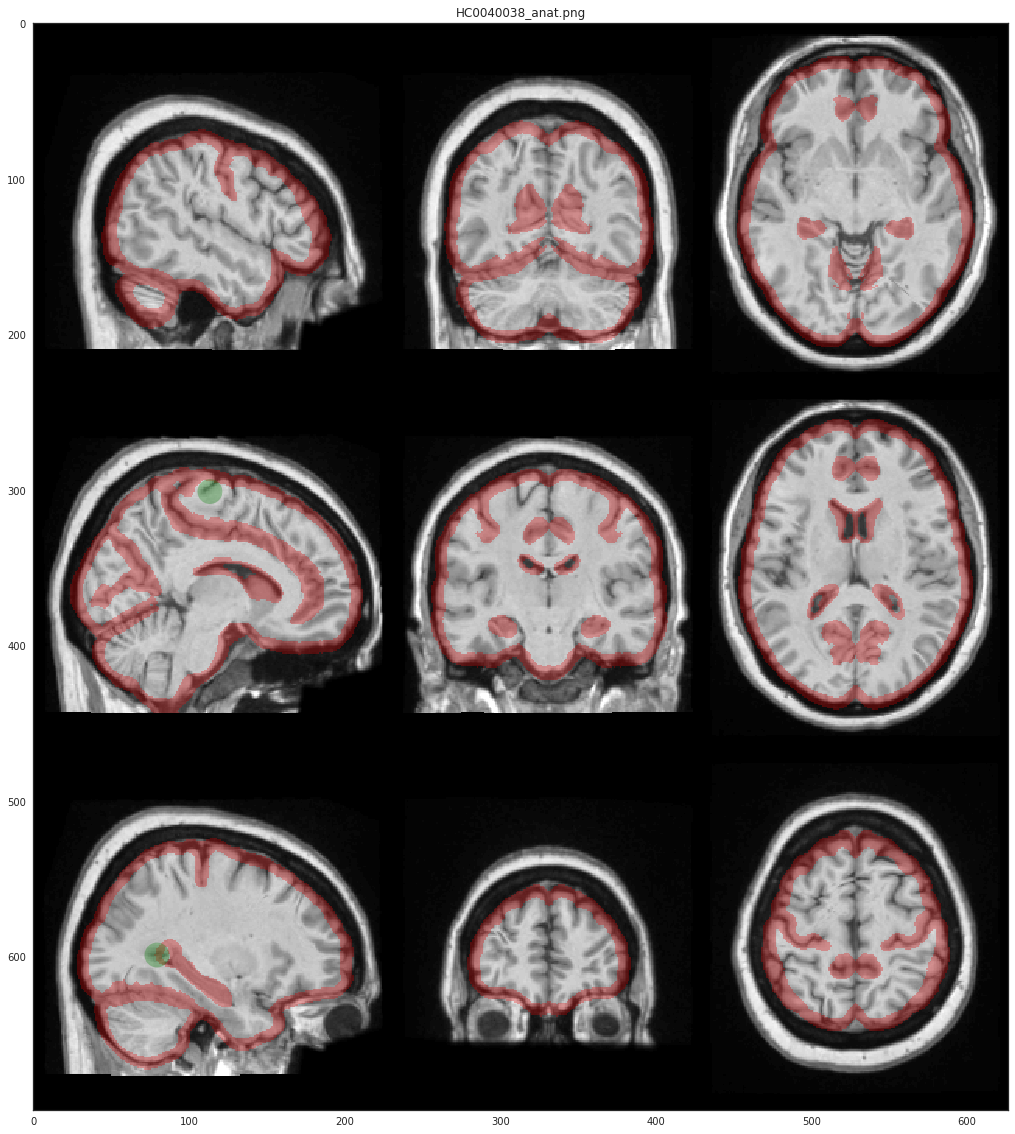

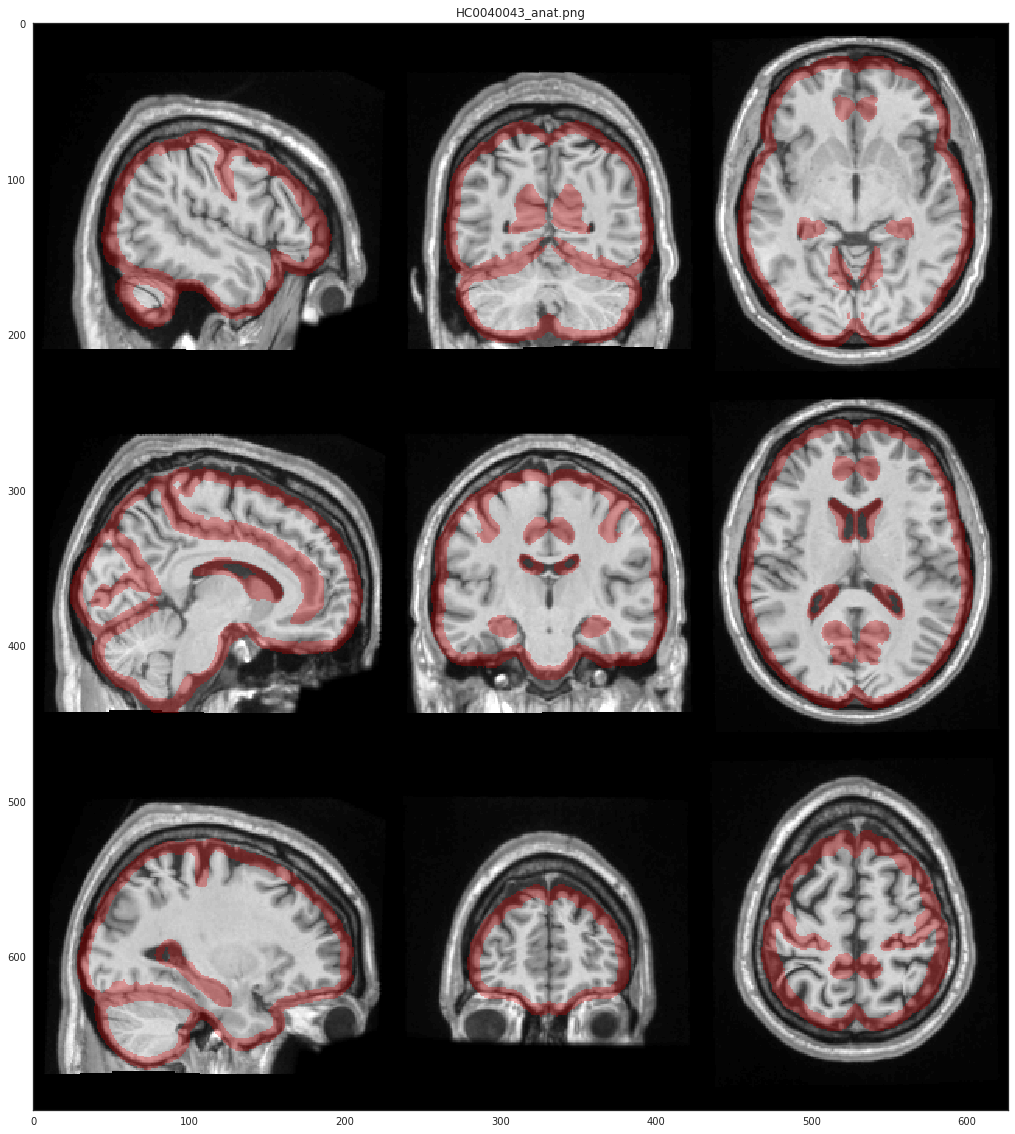

In [128]:
for ind, row in df_ids_imgnm.iterrows():
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    im = plt.imread(os.path.join(base_path_dest, row.imgnm))
    ax.imshow(im)
    out_tmp = out_kappa[out_kappa['ID'] == row.ID]
    patches = [plt.Circle((row.x,row.y), 8) for ind,row in out_tmp.iterrows()]
    coll = matplotlib.collections.PatchCollection(patches, facecolors='green',alpha=0.3,linewidth=2)
    ax.add_collection(coll)
    ax.set_title(row.imgnm)
    fig.legend(handles=patches, labels= out_tmp.workflow_name.unique().tolist())

In [104]:
out_tmp.workflow_name.unique().tolist()

['Start Project']

In [105]:
a=out_tmp.sort_index().groupby('workflow_name')

In [106]:
[a.rating.unique().get_values().tolist(),a.workflow_name.unique().get_values().tolist()]

[[array(['Fail', 'Maybe'], dtype=object)],
 [array(['Start Project'], dtype=object)]]

In [374]:

np.reshape([a.rating.unique().get_values(),a.workflow_name.unique().get_values()],(2,np.shape(a.rating.unique())[0]))

(array([array(['OK'], dtype=object), array(['Maybe'], dtype=object),
        array(['OK'], dtype=object), array(['Maybe'], dtype=object),
        array(['Maybe'], dtype=object)], dtype=object),
 array([array(['Angela'], dtype=object), array(['Basile'], dtype=object),
        array(['Benjamin'], dtype=object), array(['Maxime'], dtype=object),
        array(['Sara'], dtype=object)], dtype=object))

In [383]:
label_all = np.reshape([a.rating.unique().get_values(),a.workflow_name.unique().get_values()],(2,np.shape(a.rating.unique())[0]))

In [ ]:
x = np.reshape(np.random.randint(30,500,100), (2,50))

for ind, row in df_ids_imgnm.iterrows():
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    im = plt.imread(os.path.join(base_path, a.imgnm))
    ax.imshow(im)

patches = [plt.Circle((x[0, ind],x[1, ind]), 5) for ind in range(x.shape[1])]

coll = matplotlib.collections.PatchCollection(patches, facecolors='green',alpha=0.3,linewidth=2)
ax.add_collection(coll)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


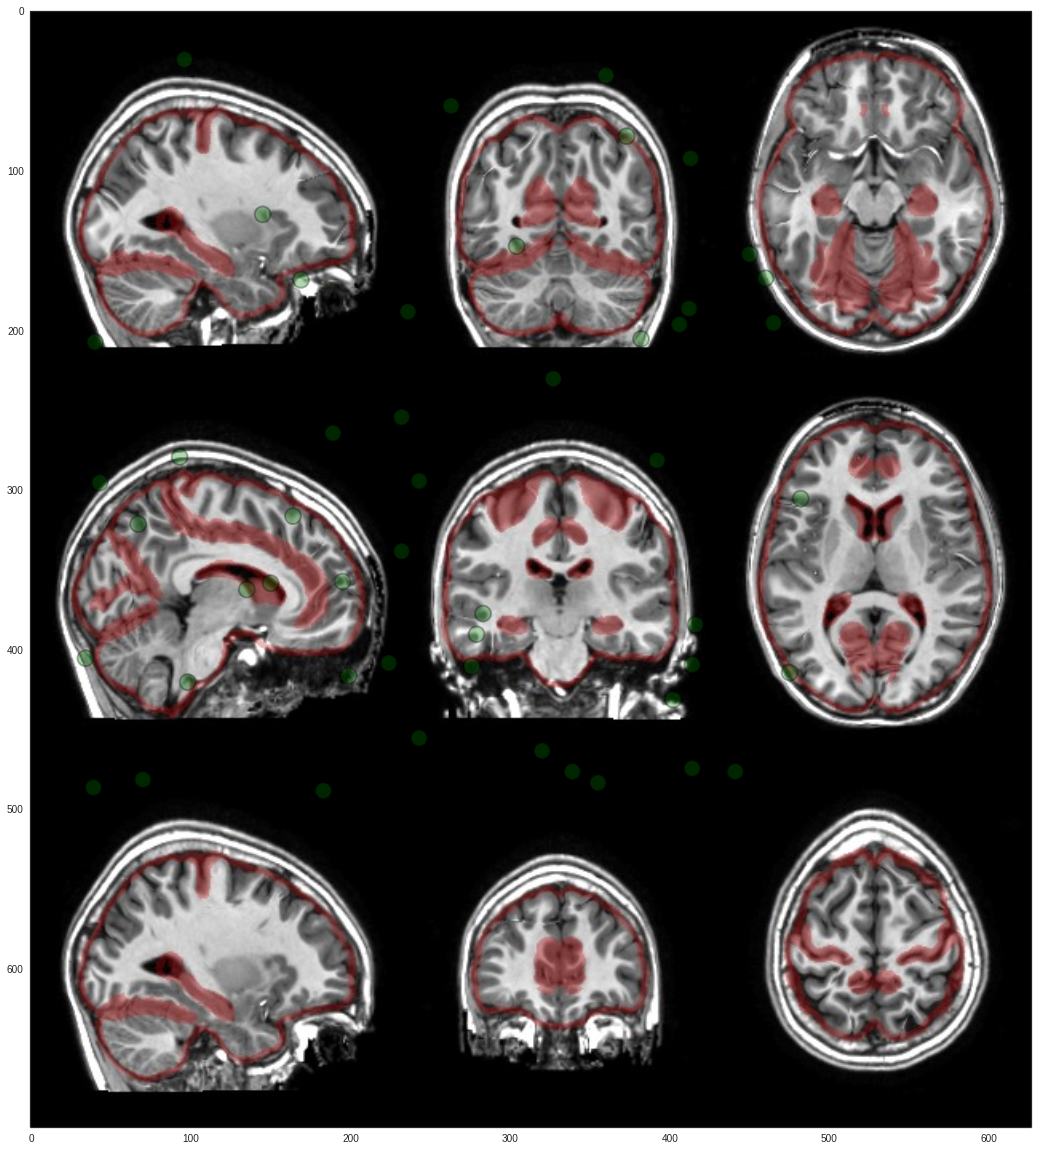

In [143]:
#seb xp 
x = np.reshape(np.random.randint(30,500,100), (2,50))

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
im = plt.imread(os.path.join(base_path, a.imgnm))
ax.imshow(im)

patches = [plt.Circle((x[0, ind],x[1, ind]), 5) for ind in range(x.shape[1])]

coll = matplotlib.collections.PatchCollection(patches, facecolors='green',alpha=0.3,linewidth=2)
ax.add_collection(coll)

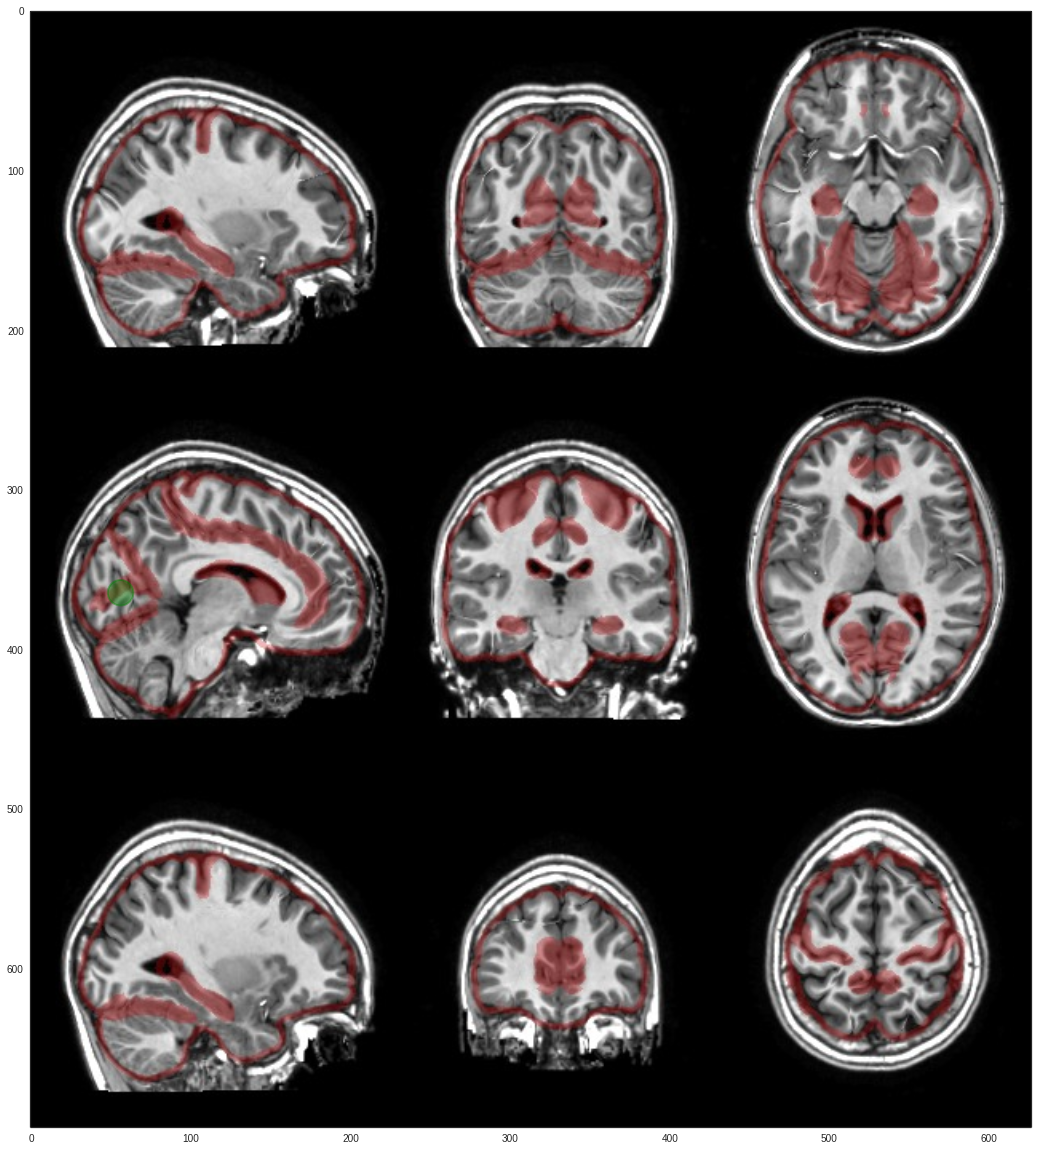

In [34]:
# Make Images
base_path = '/media/yassinebha/database29/Drive/QC_zooniverse/zooqc_adhd200_01-Mar-2017/registration'
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
im = plt.imread(os.path.join(base_path, a.imgnm))
ax.imshow(im)
ax.add_artist(plt.Circle( (a.x, a.y), 8, color='green', fill=True, linewidth=2, alpha=0.4))

In [36]:
mat = np.zeros(im.shape[:2])
mat[20:60, 20:60] = 1

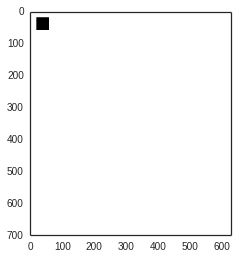

In [37]:
# Make Images
base_path = '/media/yassinebha/database29/Drive/QC_zooniverse/zooqc_adhd200_01-Mar-2017/registration'
fig, ax = plt.subplots()
im = plt.imread(os.path.join(base_path, a.imgnm))
ax.imshow(im)
ax.imshow(mat)

In [ ]:
# Make Images

# Select Subject Index Number
subsel=12

marks = out[out.subject_ids == usub.subject_ids[subsel]]
imgnm = list(json.loads(usub.subject_data[subsel]).values())[0]['IMG_COLOR']

imgpath='../ap_sampledata/'
imgfile=imgpath+imgnm

fig, ax = plt.subplots()
im = plt.imread(a.imgnm)
ax.imshow(im)
for index, m in marks.iterrows():
    if m.tool == 0:
        ax.add_artist(plt.Circle( (m.x, m.y), m.r, color='b', fill=False))
    if m.tool == 1:
        ax.add_artist(plt.Circle( (m.x, m.y), m.r, color='r', fill=False))
    if m.tool > 1:
        ax.add_artist(plt.Circle( (m.x, m.y), m.r, color='g', fill=False))

plt.axis('off')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('out_'+imgnm, dpi=120, bbox_inches='tight', pad_inches=0)